In [2]:
#importing librarirees
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
import requests
import openmeteo_requests
import requests_cache
from retry_requests import retry

`Open meteo` provides us with the code for exracting data from their API. The code is implemented below

In [4]:

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2021-03-01",
	"end_date": "2025-03-04",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm

hourly_dataframe = pd.DataFrame(data = hourly_data)
#first five rows
hourly_dataframe.head()

Coordinates 52.5483283996582°N 13.407821655273438°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2021-03-01 00:00:00+00:00,3.4585,92.177605,2.3085,0.800352,0.0,0.0,0.0,0.0,3.0,...,276.008911,9.360000,3.4085,4.8085,4.8085,5.1585,0.359,0.359,0.345,0.254
1,2021-03-01 01:00:00+00:00,3.1085,94.148003,2.2585,0.441361,0.0,0.0,0.0,0.0,2.0,...,263.991089,10.440001,3.5085,4.7085,4.8085,5.1585,0.359,0.359,0.345,0.254
2,2021-03-01 02:00:00+00:00,3.0585,94.481461,2.2585,0.185902,0.0,0.0,0.0,0.0,3.0,...,264.805664,12.959999,3.5585,4.6085,4.8085,5.1585,0.359,0.359,0.345,0.254
3,2021-03-01 03:00:00+00:00,3.0085,94.816238,2.2585,0.084275,0.0,0.0,0.0,0.0,3.0,...,264.920471,13.679999,3.5585,4.5585,4.8085,5.1585,0.359,0.359,0.345,0.254
4,2021-03-01 04:00:00+00:00,2.9085,95.489784,2.2585,-0.003949,0.0,0.0,0.0,0.0,3.0,...,259.695221,13.679999,3.5585,4.5085,4.8085,5.1585,0.358,0.359,0.345,0.254


In [5]:
#dataframe structure
hourly_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35160 entries, 0 to 35159
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           35160 non-null  datetime64[ns, UTC]
 1   temperature_2m                 35160 non-null  float32            
 2   relative_humidity_2m           35160 non-null  float32            
 3   dew_point_2m                   35160 non-null  float32            
 4   apparent_temperature           35160 non-null  float32            
 5   precipitation                  35160 non-null  float32            
 6   rain                           35160 non-null  float32            
 7   snowfall                       35160 non-null  float32            
 8   snow_depth                     34560 non-null  float32            
 9   weather_code                   35160 non-null  float32            
 10  pressure_msl          

# 1. EXPLORATORY DATA ANALYSIS

### 1.1 DEALING WITH NULL VALUES

In [6]:
#check for null values
hourly_dataframe.isna().sum()

date                               0
temperature_2m                     0
relative_humidity_2m               0
dew_point_2m                       0
apparent_temperature               0
precipitation                      0
rain                               0
snowfall                           0
snow_depth                       600
weather_code                       0
pressure_msl                       0
surface_pressure                   0
cloud_cover                        0
cloud_cover_low                    0
cloud_cover_mid                    0
cloud_cover_high                   0
et0_fao_evapotranspiration         0
vapour_pressure_deficit            0
wind_speed_10m                     0
wind_speed_100m                    0
wind_direction_10m                 0
wind_direction_100m                0
wind_gusts_10m                     0
soil_temperature_0_to_7cm          0
soil_temperature_7_to_28cm         0
soil_temperature_28_to_100cm       0
soil_temperature_100_to_255cm      0
s

Looking at the output above, we can see most columns are missing `47` records which is almost `0.13` of the total records except for `snow_depth` which has `648` records missing. Although the number of missing records is not that significant, we can not drop the rows with missing values since we might end up loosing more data. Since our data is continous and numerical we will use the `mean` imputation method to fill the missing values. We will use the `SimpleImputer` from the `sklearn.impute` module to do this.

In [7]:
#instantiate the imputer
imputer = SimpleImputer(strategy= "mean")
#split date
date = hourly_dataframe["date"]
#getting numerical columns
num_cols = hourly_dataframe.drop(columns= "date")
#imputting the missing values
imputed_data= pd.DataFrame(imputer.fit_transform(num_cols), columns=num_cols.columns)
#concatenate the imputed data with the date column
weather_data = pd.concat([date, imputed_data], axis=1)
#info of the dataframe
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35160 entries, 0 to 35159
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           35160 non-null  datetime64[ns, UTC]
 1   temperature_2m                 35160 non-null  float32            
 2   relative_humidity_2m           35160 non-null  float32            
 3   dew_point_2m                   35160 non-null  float32            
 4   apparent_temperature           35160 non-null  float32            
 5   precipitation                  35160 non-null  float32            
 6   rain                           35160 non-null  float32            
 7   snowfall                       35160 non-null  float32            
 8   snow_depth                     35160 non-null  float32            
 9   weather_code                   35160 non-null  float32            
 10  pressure_msl          

In [8]:
#checking for null values
weather_data.isna().sum()

date                             0
temperature_2m                   0
relative_humidity_2m             0
dew_point_2m                     0
apparent_temperature             0
precipitation                    0
rain                             0
snowfall                         0
snow_depth                       0
weather_code                     0
pressure_msl                     0
surface_pressure                 0
cloud_cover                      0
cloud_cover_low                  0
cloud_cover_mid                  0
cloud_cover_high                 0
et0_fao_evapotranspiration       0
vapour_pressure_deficit          0
wind_speed_10m                   0
wind_speed_100m                  0
wind_direction_10m               0
wind_direction_100m              0
wind_gusts_10m                   0
soil_temperature_0_to_7cm        0
soil_temperature_7_to_28cm       0
soil_temperature_28_to_100cm     0
soil_temperature_100_to_255cm    0
soil_moisture_0_to_7cm           0
soil_moisture_7_to_2

With the missing data points delt with, we can look at the duplicates
### 1.2 DUPLICATES

In [9]:
weather_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35155    False
35156    False
35157    False
35158    False
35159    False
Length: 35160, dtype: bool

Our data doesn't seem to have any duplicates which is a good thing.
### 1.3 OUTLIERS
Outliers are data points that are significantly different from the rest of the data. They can be either very high or very low values. Outliers can be caused by a variety of factors such as measurement errors, data entry errors, or unusual events. Outliers can have a significant impact on the analysis and interpretation of the data. They can skew the results of statistical tests and make it difficult to identify patterns in the data. To check for outliers we will use a boxplot visual to see if there are any values that are significantly different from the rest of the data.

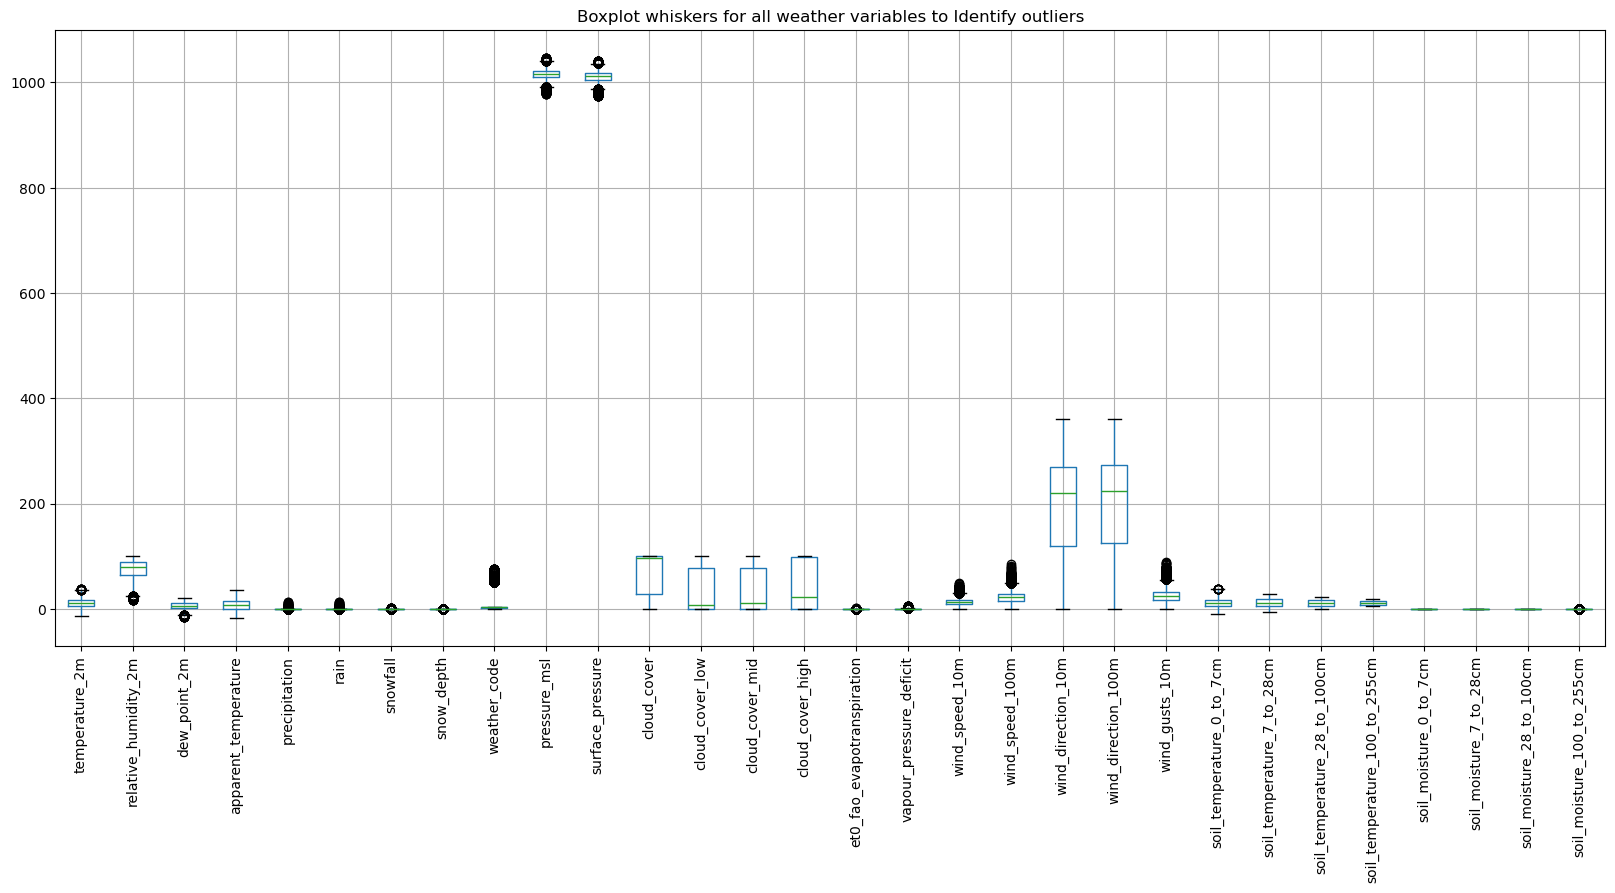

In [10]:
plt.figure(figsize=(20, 8))
weather_data.boxplot()
plt.title("Boxplot whiskers for all weather variables to Identify outliers")
plt.xticks(rotation = 90)
plt.show();